In [1]:
!pip install -q -U google-generativeai
!pip install google-cloud-vision

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import google.generativeai as genai
from IPython.display import Markdown
from PIL import Image
from google.cloud import vision
from datetime import datetime
import json

In [4]:
from google.colab import userdata

GENAI_API_KEY = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GENAI_API_KEY)


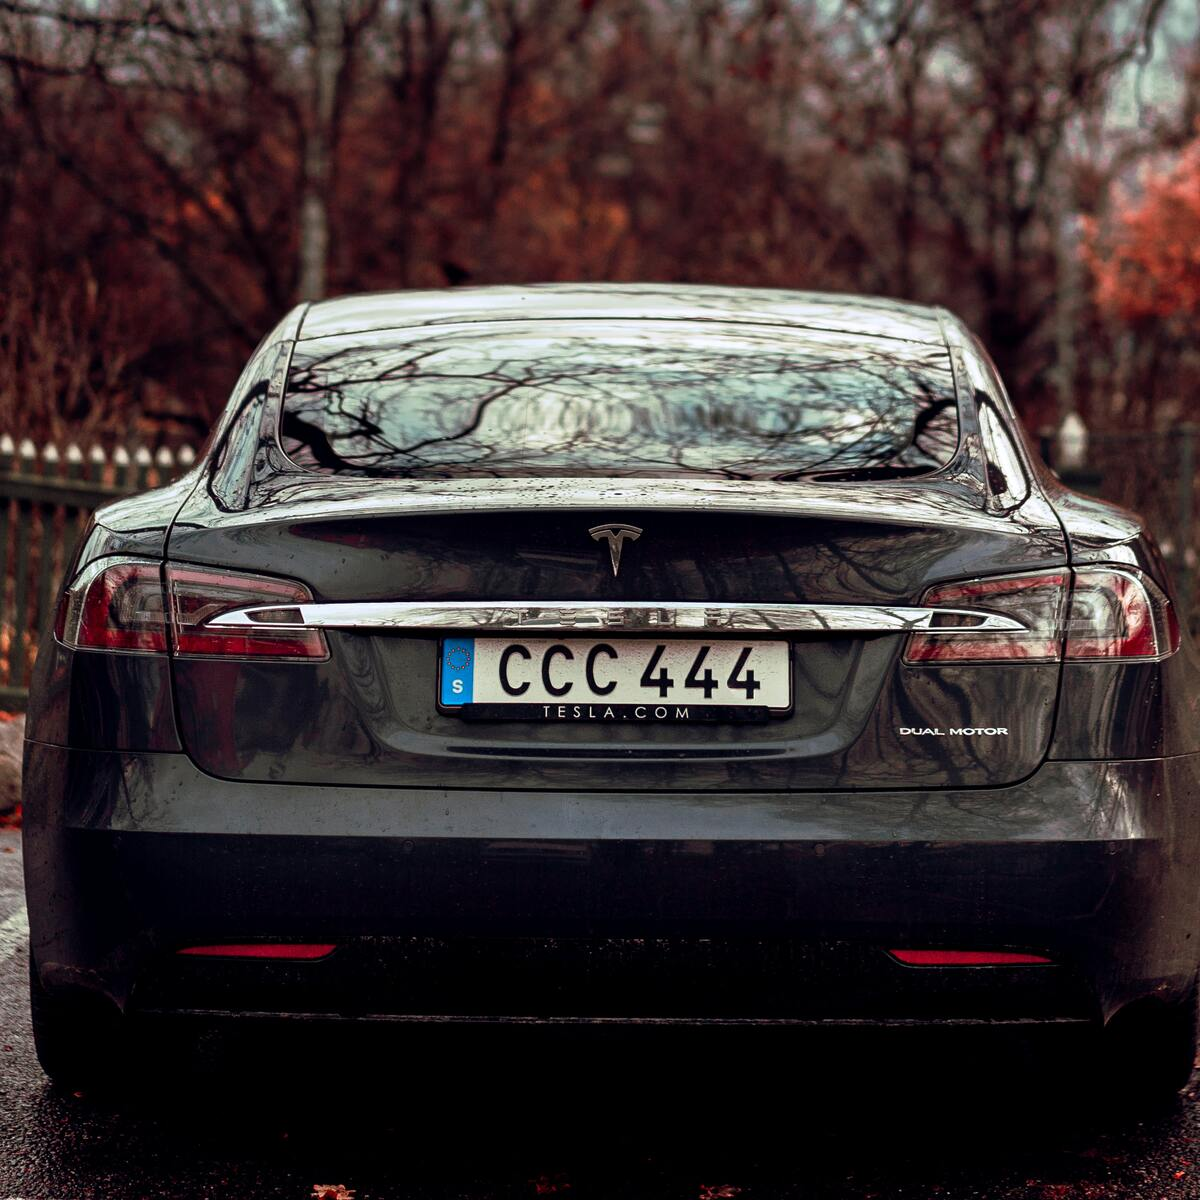

In [21]:
image_path="/content/drive/MyDrive/mobil plat.jpg"
image = Image.open(image_path)
image

In [22]:
# Upload the file and print a confirmation.
license_plate = genai.upload_file(image_path,
                            display_name="License Plate")

print(f"Uploaded file '{license_plate.display_name}' as: {license_plate.uri}")

Uploaded file 'License Plate' as: https://generativelanguage.googleapis.com/v1beta/files/u3r1j4f2q1fn


In [25]:

# Initialize Gemini API
def initialize_gemini():
    genai.configure(api_key=GENAI_API_KEY)
    print("Gemini API initialized successfully.")

# Upload the image file and get its reference URI
def upload_image(file_path, display_name="License Plate"):
    print(f"Uploading image: {file_path}")
    uploaded_file = genai.upload_file(path=file_path, display_name=display_name)
    print(f"Uploaded file '{uploaded_file.display_name}' as: {uploaded_file.uri}")
    return uploaded_file.uri

# Generate vehicle details using the Gemini API
def generate_vehicle_details(image_uri):
    # Create a prompt for the model
    prompt = f"""
    I have an image uploaded with the following URI: "{image_uri}".
    Analyze the image and extract the following information:
    - License plate number
    - Vehicle type (e.g., car, motorcycle, scooter)
    - Vehicle color
    - Gate open and close timestamps
    - Plate expiration date (formatted as "MM YY" with full month name and year).

    Return the result as a JSON object with keys 'plat_no', 'vehicle', 'vehicle_type', 'color', 'gate_open', 'gate_closed', and 'plat_exp'.
    """

    # Choose the Gemini model
    model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")

    # Generate the response
    response = model.generate_content([prompt])
    print("Response received from Gemini API.")
    return response.text

# Save JSON output to a file
def save_json_output(json_data, output_file="vehicle_details.json"):
    with open(output_file, "w") as file:
        json.dump(json_data, file, indent=4)
    print(f"JSON data has been saved to '{output_file}'.")

# Main function
# Main function
def main():
    # Initialize Gemini API
    initialize_gemini()

    # Path to the input image
    image_path = "/content/drive/MyDrive/mobil plat.jpg"  # Replace with your actual image path

    # Upload the image and get its URI
    image_uri = upload_image(image_path)

    # Generate vehicle details
    vehicle_details_json = generate_vehicle_details(image_uri)

    # Print the raw response for debugging
    print("Raw Response Text:")
    print(vehicle_details_json)

    # Parse the JSON response
    try:
        vehicle_details = json.loads(vehicle_details_json)
        print("Generated JSON Output:")
        print(json.dumps(vehicle_details, indent=4))
    except json.JSONDecodeError:
        print("Error: Failed to parse JSON response.")
        vehicle_details = {"error": "Invalid JSON format in response."}

    # Save the output to a file
    save_json_output(vehicle_details)

if __name__ == "__main__":
    main()

Gemini API initialized successfully.
Uploading image: /content/drive/MyDrive/mobil plat.jpg
Uploaded file 'License Plate' as: https://generativelanguage.googleapis.com/v1beta/files/qvs8go81qxln
Response received from Gemini API.
Raw Response Text:
```json
{
  "plat_no": "Unable to determine",
  "vehicle": "Unable to determine",
  "vehicle_type": "Unable to determine",
  "color": "Unable to determine",
  "gate_open": "Unable to determine",
  "gate_closed": "Unable to determine",
  "plat_exp": "Unable to determine"
}
```

**Explanation:**

I'm a large language model, and while I can process text and understand context, I cannot directly access or analyze images from external URLs like the one provided.  Image analysis requires computer vision capabilities, which I don't possess.  To perform the tasks you've requested, you would need to use an image analysis API or library that can:

1. **Access the image:** Download the image from the provided URL.
2. **Optical Character Recognition (OCR